<a href="https://colab.research.google.com/github/ambika1us/Hotel_Booking_Analysis/blob/main/Ambika_Prasad_Rath__Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

*   <B>Understanding the Data:</B> A brief exploration of all the variable and their relationship.
*   <B>Data Cleaning:</B> Checking for missing values, handling NaNs.
*   <B>Visualising data:</B> With the help of plots, see what the data says.
*   <B>Drawing Conclusion:</B>Understanding what are the cause of the problem statement.

In [ ]:
#Importing neccrsary libraries
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Reading and Inspection
hotel_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA_Project_1/Hotel Bookings.csv')

In [ ]:
#Checking Datatypes
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Statistical aspects of the dataframe
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = hotel_data['hotel'].value_counts().index.tolist()

In [ ]:
sizes = hotel_data['hotel'].value_counts().tolist()


In [ ]:
explode=(0,0.1)
colors=['Coral','Yellowgreen']


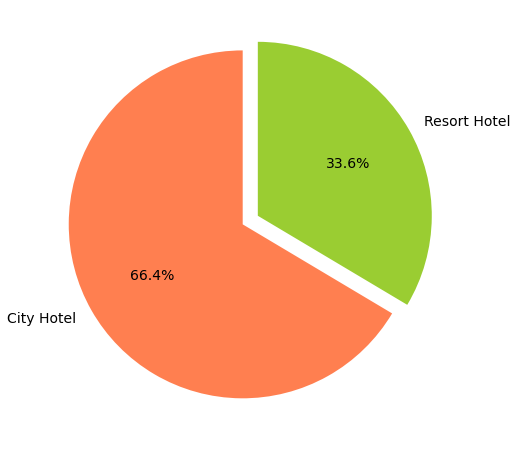

In [ ]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()
#Percentage of City Hotel is more compare to Resort Hotel


<B>Cleaning the Data</B>

In [ ]:
#Checking the missing Values in the columns
hotel_data.isnull().sum()
print(round(100*hotel_data.isnull().sum()/len(hotel_data.index),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [ ]:
#Drop the columns with high missing values
hotel_data=hotel_data.drop(['agent','company'],axis=1)

In [ ]:
#country have some few NaN values compare to total data, which is negligible hence will just remove that 
hotel_data=hotel_data.dropna(axis=0)
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#Renaming the columns for better readability
hotel_data.columns=["Hotel","Cancelled","LeadTime","ArrivingYear","ArrivingMonth","ArrivingWeek","ArrivingDate","WeekendStay","WeekStay",
                    "Adult","Children","Babies","Meal","Country","Segment","DistChannel","RepeatGust","PrevCancel","PrevBook","BookRoomType","AssignRoomType",
                    "ChangeBooking","DepositType","WaitingDays","CustomerType","ADR","ParkingSpace","SpecialRequest","Reservation","ReservationDate"]

In [ ]:
from pandas.core.strings.accessor import cat_core
def var(hotel_data):
  unique_list=pd.DataFrame([[i,len(hotel_data[i].unique())]for i in hotel_data.columns])
  unique_list.columns=['name','uniques']
  total_var=set(hotel_data.columns)
  cat_var=set(unique_list.name[(unique_list.uniques<=12)|
                               (unique_list.name=='Country')|
                               (unique_list.name=='Agent')
                               ])
  con_var=total_var-cat_var
  return cat_var,con_var
cat_var,con_var=var(hotel_data)
print("Continues Varialble(",len(con_var),")\n",con_var,'\n\n'"Categotical Variable(",len(cat_var),")\n",cat_var)


Continues Varialble( 12 )
 {'PrevBook', 'ArrivingWeek', 'WaitingDays', 'LeadTime', 'ArrivingDate', 'PrevCancel', 'ReservationDate', 'WeekStay', 'ADR', 'ChangeBooking', 'Adult', 'WeekendStay'} 

Categotical Variable( 18 )
 {'ParkingSpace', 'Cancelled', 'CustomerType', 'Reservation', 'DepositType', 'Country', 'Children', 'Hotel', 'AssignRoomType', 'RepeatGust', 'BookRoomType', 'SpecialRequest', 'ArrivingMonth', 'Meal', 'Segment', 'ArrivingYear', 'Babies', 'DistChannel'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

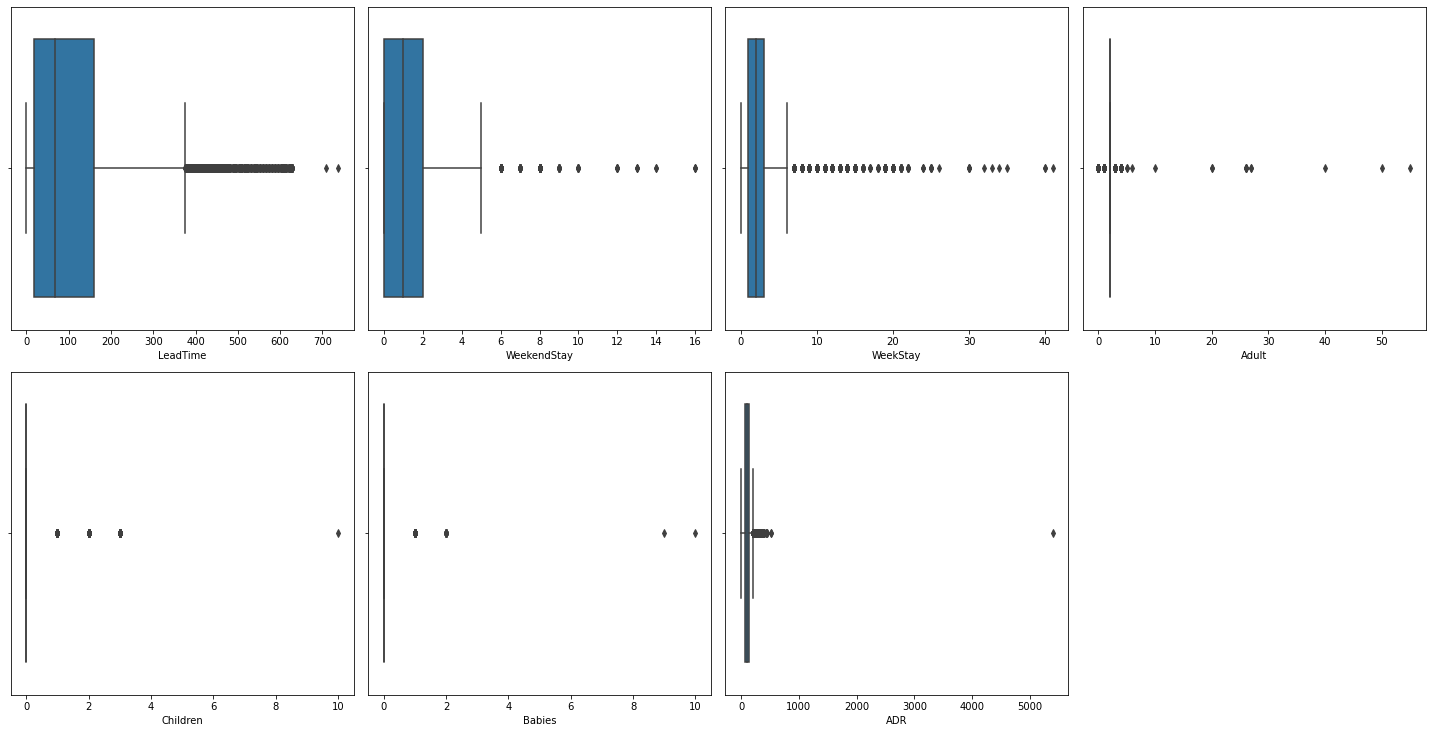

In [ ]:
#Checking the outliers
#Creating a boxplot for outlieers detection
fea=['LeadTime','WeekendStay','WeekStay','Adult','Children','Babies','ADR']
n=1
plt.figure(figsize=(20,20))
for fea in fea:
  plt.subplot(4,4,n)
  sns.boxplot(hotel_data[fea])
  n+=1
  plt.tight_layout()

In [ ]:
hotel_data[con_var].describe()

,PrevBook,ArrivingWeek,WaitingDays,LeadTime,ArrivingDate,PrevCancel,WeekStay,ADR,ChangeBooking,Adult,WeekendStay
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.131634,27.166555,2.330754,104.311435,15.800880,0.087142,2.502145,102.003243,0.221181,1.858391,0.928897
std,1.484672,13.589971,17.630452,106.903309,8.780324,0.845869,1.900168,50.485862,0.652785,0.578576,0.996216
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,18.000000,8.000000,0.000000,1.000000,70.000000,0.000000,2.000000,0.000000
50%,0.000000,28.000000,0.000000,69.000000,16.000000,0.000000,2.000000,95.000000,0.000000,2.000000,1.000000
75%,0.000000,38.000000,0.000000,161.000000,23.000000,0.000000,3.000000,126.000000,0.000000,2.000000,2.000000
max,72.000000,53.000000,391.000000,737.000000,31.000000,26.000000,41.000000,5400.000000,21.000000,55.000000,16.000000


In [ ]:
hotel_data.loc[hotel_data.LeadTime>500,'LeadTime']=500
hotel_data.loc[hotel_data.WaitingDays>0,'WaitingDays']=1
hotel_data.loc[hotel_data.WeekendStay>=5,'WeekendStay']=5
hotel_data.loc[hotel_data.Adult>4,'Adult']=4
hotel_data.loc[hotel_data.PrevBook>0,'PrevBook']=1
hotel_data.loc[hotel_data.PrevCancel>0,'PrevCancel']=1
hotel_data.loc[hotel_data.WeekStay>10,'WeekStay']=10
hotel_data.loc[hotel_data.ChangeBooking>5,'ChangeBooking']=5
cat_var=set(list(cat_var)+['PrevBook','PrevCancel'])
con_var=set(hotel_data.columns)-cat_var
hotel_data[con_var].describe()

,ArrivingWeek,WaitingDays,LeadTime,ArrivingDate,WeekStay,ADR,ChangeBooking,Adult,WeekendStay
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,27.166555,0.031102,104.054543,15.800880,2.481581,102.003243,0.217237,1.855607,0.924187
std,13.589971,0.173595,105.834923,8.780324,1.760766,50.485862,0.602693,0.488194,0.967762
min,1.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,18.000000,8.000000,1.000000,70.000000,0.000000,2.000000,0.000000
50%,28.000000,0.000000,69.000000,16.000000,2.000000,95.000000,0.000000,2.000000,1.000000
75%,38.000000,0.000000,161.000000,23.000000,3.000000,126.000000,0.000000,2.000000,2.000000
max,53.000000,1.000000,500.000000,31.000000,10.000000,5400.000000,5.000000,4.000000,5.000000


In [ ]:
hotel_data.loc[hotel_data.Babies>8,'Babies']=0
hotel_data.loc[hotel_data.ParkingSpace>5,'ParkingSpace']=0
hotel_data.loc[hotel_data.Children>8,'Children']=0
hotel_data[cat_var].describe()

,Cancelled,Children,PrevCancel,Babies,PrevBook,ParkingSpace,RepeatGust,ArrivingYear,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,0.104123,0.054223,0.007788,0.028571,0.061750,0.032011,2016.157656,0.571683
std,0.483168,0.398139,0.226458,0.089236,0.166597,0.241992,0.176029,0.707459,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2017.000000,5.000000


<B>Data Preparation for anlysis</B>

In [ ]:
#Combined children and babies as kids
hotel_data['Kids']=hotel_data.Children+hotel_data.Babies
#Combined total members by adding kids and adults
hotel_data['total_members']=hotel_data.Kids+hotel_data.Adult

In [ ]:
#Convorting the datatypes to string
hotel_data['ArrivingYear']=hotel_data['ArrivingYear'].astype('str')
hotel_data['ArrivingMonth']=hotel_data['ArrivingMonth'].astype('str')
hotel_data['ArrivingDate']=hotel_data['ArrivingDate'].astype('str')
hotel_data['Cancelled']=hotel_data['Cancelled'].astype('str')
hotel_data['RepeatGust']=hotel_data['RepeatGust'].astype('str')

In [ ]:
#Converting arrival date to datetime
hotel_data['Arrival Date']=hotel_data['ArrivingDate']+'-'+hotel_data['ArrivingMonth']+'-'+hotel_data['ArrivingYear']
hotel_data['Arrival Date']=pd.to_datetime(hotel_data['Arrival Date'],errors='coerce')
confirmed_booking=hotel_data[hotel_data.Cancelled=='0']
import datetime as dt
confirmed_booking['ArrivingMonth']=hotel_data['Arrival Date'].dt.month
final_count=confirmed_booking['ArrivingMonth'].value_counts().sort_index()
print(final_count)

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<B>Exploratory  Data Analysis and Visualization</B>

In [ ]:
print('Total Booking Cancelled')
print(hotel_data.Cancelled.value_counts())
print('Cancellation percent in both hotels')
print(hotel_data.Cancelled.value_counts(normalize=True)*100)
#Around 37% of booking cancelled

Total Booking Cancelled
0    74745
1    44153
Name: Cancelled, dtype: int64
Cancellation percent in both hotels
0    62.864808
1    37.135192
Name: Cancelled, dtype: float64


In [ ]:
#Country
print(hotel_data.Country.value_counts(normalize=True)*100)
#Around 40% of all booking were booked from Portugal followed by Great Britain and France

PRT    40.863597
GBR    10.201181
FRA     8.759609
ESP     7.206177
DEU     6.128783
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: Country, Length: 177, dtype: float64


In [ ]:
hotel_data.ArrivingMonth.value_counts(normalize=True)*100
#August is the most occupied month with 11.65% booking followed by July and January is the most unoccupied month with 4.94% booking

August       11.650322
July         10.620868
May           9.906811
October       9.331528
April         9.289475
June          9.190230
September     8.803344
March         8.191055
February      6.738549
November      5.678817
December      5.658632
January       4.940369
Name: ArrivingMonth, dtype: float64

In [ ]:
#Market Segment
hotel_data.Segment.value_counts(normalize=True)*100

Online TA        47.437299
Offline TA/TO    20.319938
Groups           16.657976
Direct           10.469478
Corporate         4.298643
Complementary     0.617336
Aviation          0.199331
Name: Segment, dtype: float64

Around 47% of booking are made by Online Travel Agents, almost 20% of booking are made by offline travel agents.

In [ ]:
hotel_data.ArrivingYear.value_counts(normalize=True)*100

2016    47.465054
2017    34.150280
2015    18.384666
Name: ArrivingYear, dtype: float64

47% booking were done in 2016,34% in 2017 and 18% in 2015..this shows increasing tendency in booking year by year

In [ ]:
hotel_data.Meal.value_counts(normalize=True)*100

BB           77.262023
HB           12.139817
SC            8.947165
Undefined     0.979831
FB            0.671164
Name: Meal, dtype: float64

Out of the meals, BB is the most ordered meal type which is around 77%, followed by HB which is around 12%

In [ ]:
hotel_data.CustomerType.value_counts(normalize=True)*100

Transient          75.000421
Transient-Party    21.092028
Contract            3.428148
Group               0.479403
Name: CustomerType, dtype: float64

Around 75% of booking is from Transient customer type followed by 21% by Transient Party

In [ ]:
hotel_data.Reservation.value_counts(normalize=True)*100

Check-Out    62.864808
Canceled     36.123400
No-Show       1.011792
Name: Reservation, dtype: float64

Around 63% of Guest checked-out and 36% booking were cancelled

In [ ]:
hotel_data.BookRoomType.value_counts(normalize=True)*100

A    71.995324
D    16.125587
E     5.464348
F     2.430655
G     1.751922
B     0.936938
C     0.783024
H     0.505475
L     0.005046
P     0.001682
Name: BookRoomType, dtype: float64

Around 72% of Guest booked Room Type A followed by Room Type D with 16%

In [ ]:
hotel_data.ADR.value_counts(normalize=True)*100

62.00     3.156487
75.00     2.279265
90.00     2.078252
65.00     2.016014
0.00      1.629969
            ...   
96.09     0.000841
48.03     0.000841
89.43     0.000841
63.07     0.000841
157.71    0.000841
Name: ADR, Length: 8870, dtype: float64

In [ ]:
hotel_data.LeadTime.value_counts(normalize=True)*100

0      5.233898
1      2.853707
2      1.709869
3      1.515585
4      1.426433
         ...   
458    0.000841
371    0.000841
424    0.000841
380    0.000841
463    0.000841
Name: LeadTime, Length: 451, dtype: float64

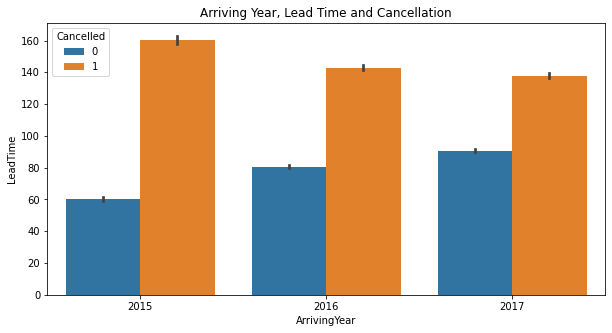

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='ArrivingYear',y='LeadTime',hue='Cancelled',data=hotel_data)
plt.title('Arriving Year, Lead Time and Cancellation')
plt.show()

All the 3 year, booking with a lead time less than 100 days have fewer chance of getting canceled, and lead time more than 100 days have more chance of getting cancelled.

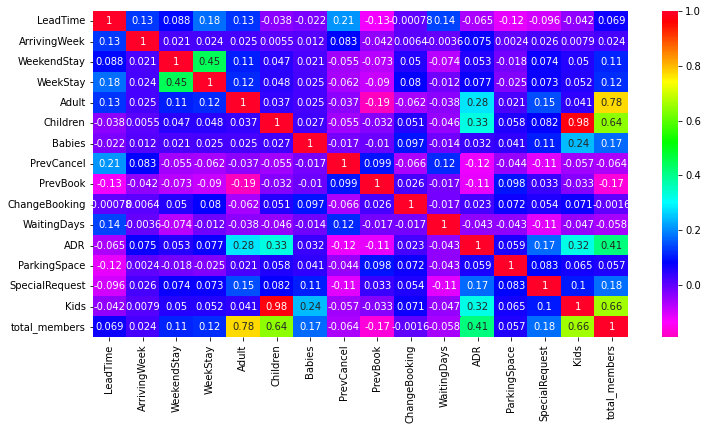

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(hotel_data.corr(),annot=True,cmap='gist_rainbow_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


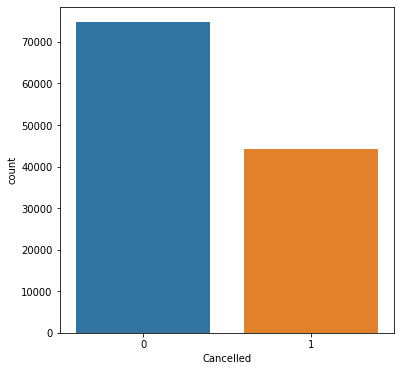

In [ ]:
plt.figure(figsize=(6,6))
#Cancelled=1,Not Cancelled=0
sns.countplot(hotel_data['Cancelled'])
plt.show()

Majority of booking were not cancelled

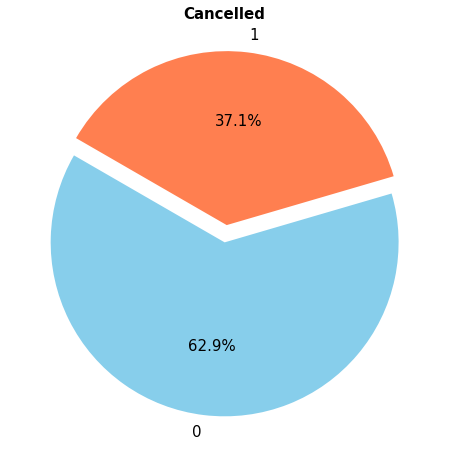

In [ ]:
sizes1=hotel_data['Cancelled'].value_counts().tolist()
labels1=hotel_data['Cancelled'].value_counts().index.tolist()
cols=['skyblue','coral']
plt.pie(sizes1,explode=explode,labels=labels1,colors=cols,autopct='%1.1f%%',startangle=150,textprops={'fontsize':15})
plt.title('Cancelled',size=15,fontweight="bold")
plt.show()

Based on above chart arround 63% of booking were not cancelled and 37% of the booking were cancelled.

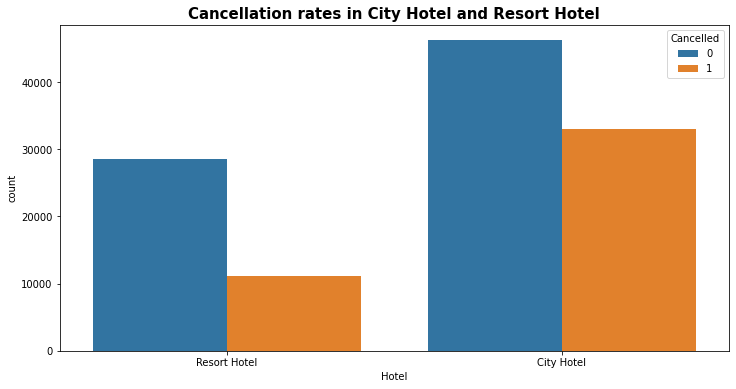

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hotel',hue='Cancelled',data=hotel_data)
plt.title("Cancellation rates in City Hotel and Resort Hotel",fontweight="bold",size=15)
plt.show()

Most bookings were in City Hotel, cancellation in Resort Hotel is less compared to City Hotels

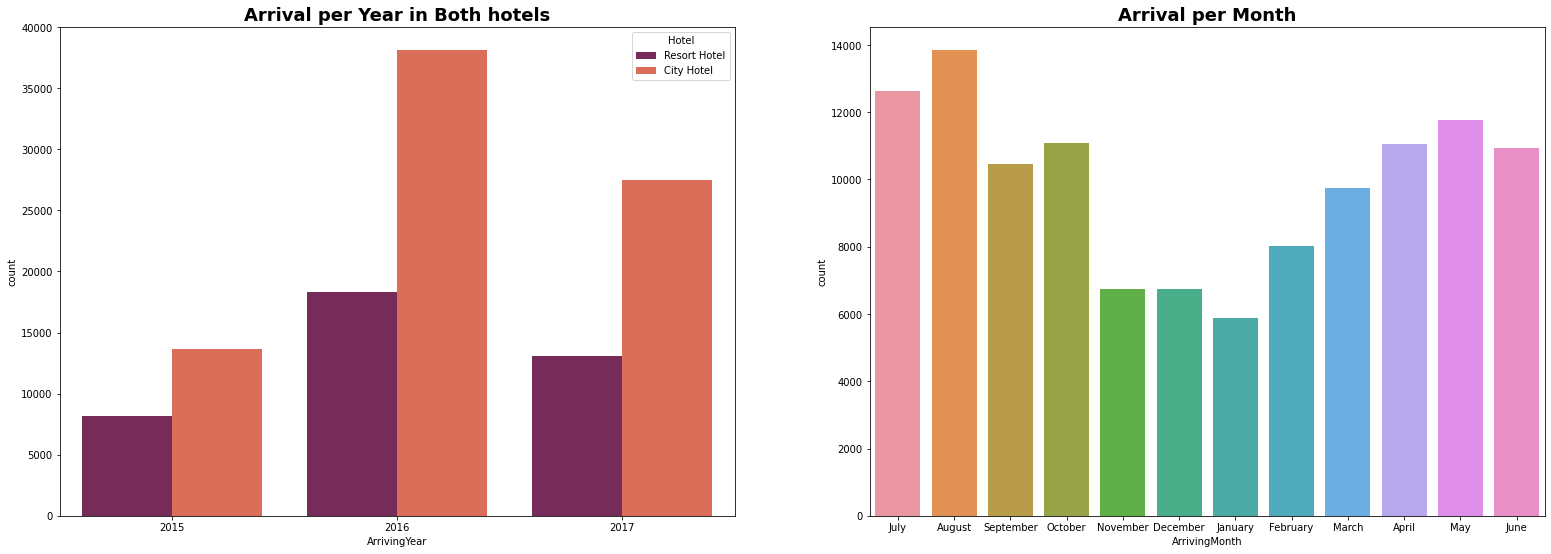

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.countplot(x='ArrivingYear',hue='Hotel',data=hotel_data,palette='rocket')
plt.title("Arrival per Year in Both hotels",fontweight="bold",size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='ArrivingMonth')
plt.title("Arrival per Month",fontweight="bold", size=18)
plt.subplots_adjust(right=1.5)
plt.show()



*  From above we can say most of the bookings are in the year 2016 and in City Hotels.
*  Most of the bookings were done in the month of May, June, July and August




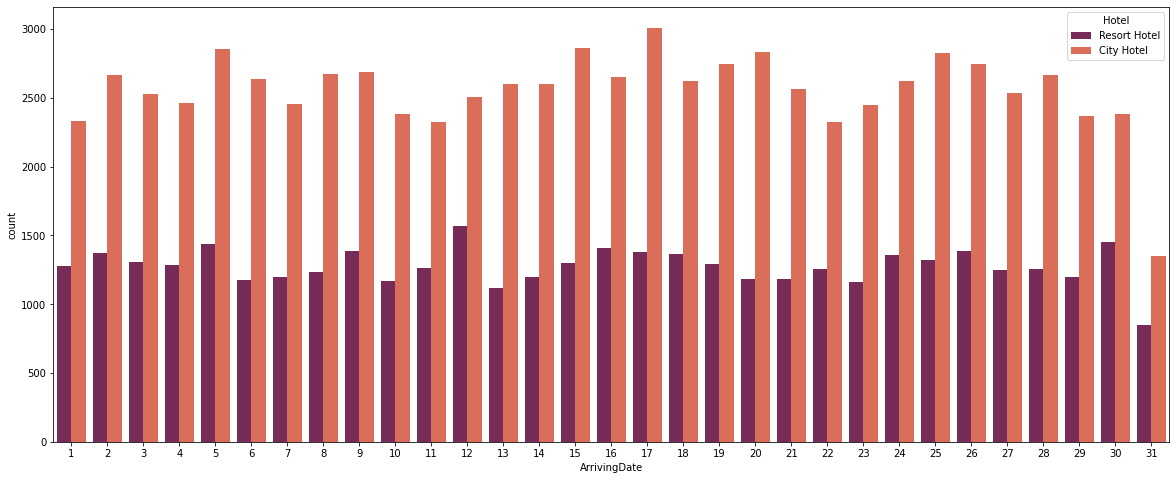

In [ ]:
#Arrival Date
plt.figure(figsize=(20,8))
sns.countplot(data=hotel_data,x='ArrivingDate',hue='Hotel',palette='rocket')
plt.show()

Month End day has very less arrivals and bookings are mostly in City Hotels

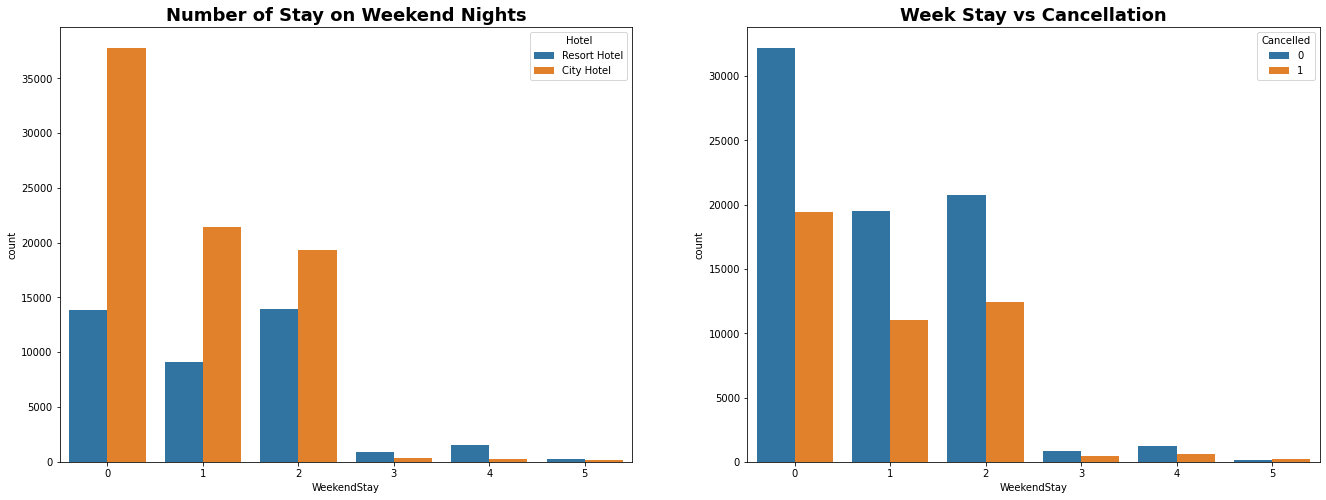

In [ ]:
#Weekend Stay
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='WeekendStay',hue='Hotel',data=hotel_data)
plt.title('Number of Stay on Weekend Nights',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='WeekendStay',hue='Cancelled')
plt.title('Week Stay vs Cancellation',fontweight='bold',size=18)
plt.subplots_adjust(right=1)
plt.show()

*   In the first graph it can be seen that most of the weekend nights were booked in city hotel
*   Second plot indicates weekend nights which were booked were not cancelled



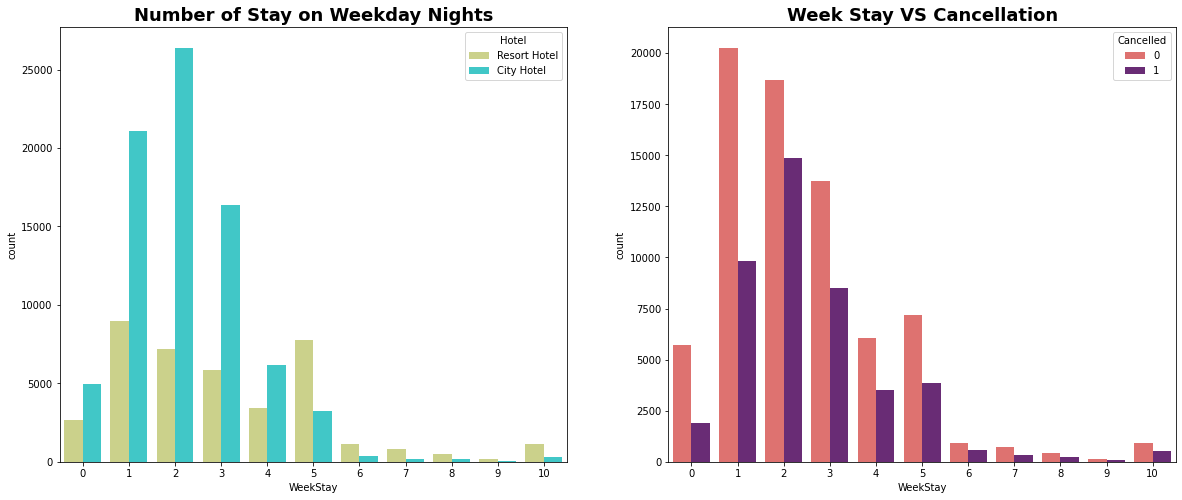

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='WeekStay',hue='Hotel',data=hotel_data,palette='rainbow_r')
plt.title('Number of Stay on Weekday Nights',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='WeekStay',hue='Cancelled',palette='magma_r')
plt.title('Week Stay VS Cancellation',fontweight='bold',size=18)

plt.show()

Weekday nights stay were more in city hotels and less cancellation observed

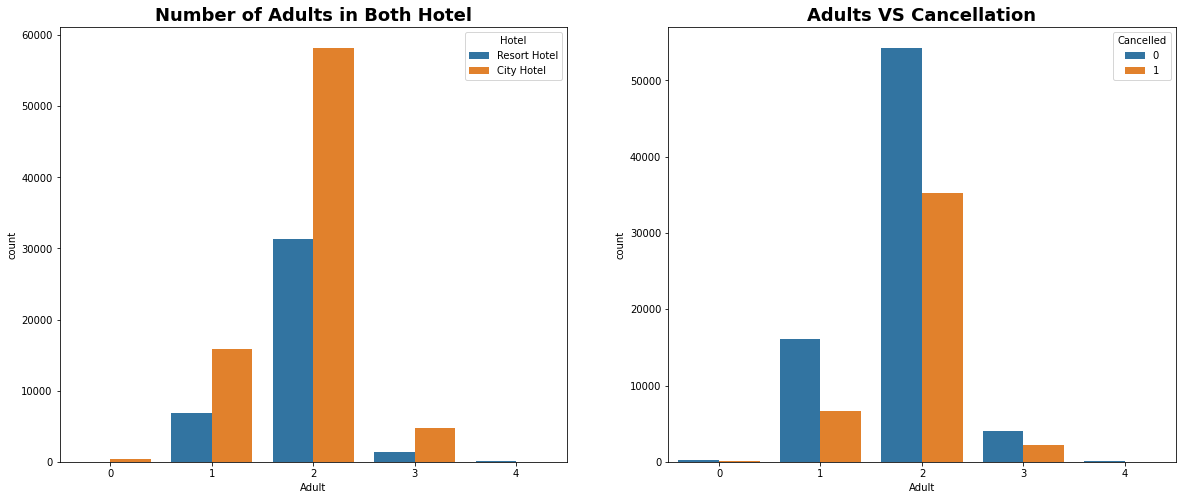

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Adult',hue='Hotel',data=hotel_data)
plt.title("Number of Adults in Both Hotel",fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Adult',hue='Cancelled')
plt.title('Adults VS Cancellation',fontweight='bold',size=18)
plt.show()

Adult who were 2 in number are more and preferred city hotel over resort hotel

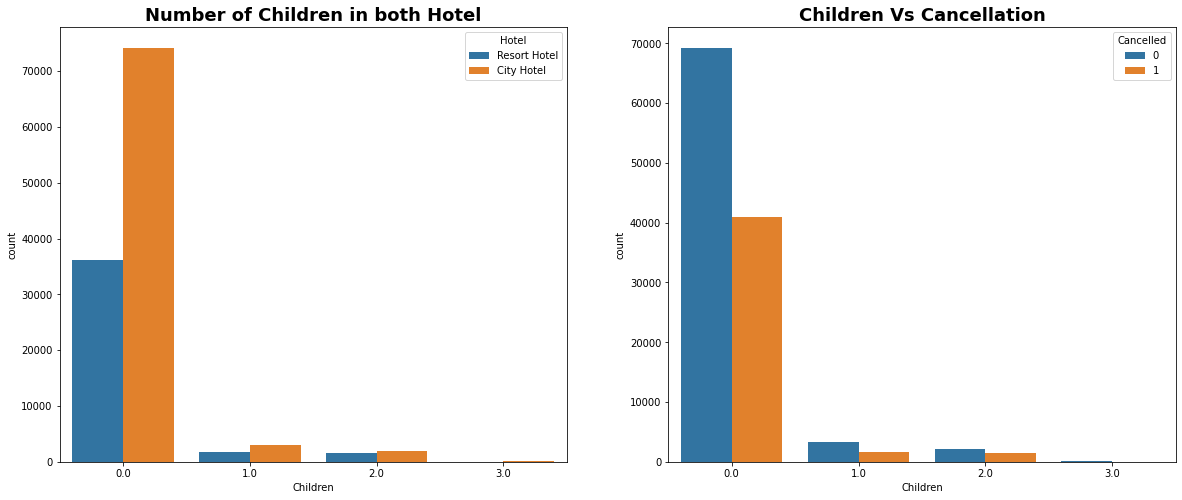

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Children',hue='Hotel',data=hotel_data)
plt.title('Number of Children in both Hotel',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Children',hue='Cancelled')
plt.title('Children Vs Cancellation',fontweight='bold',size=18)
plt.show()

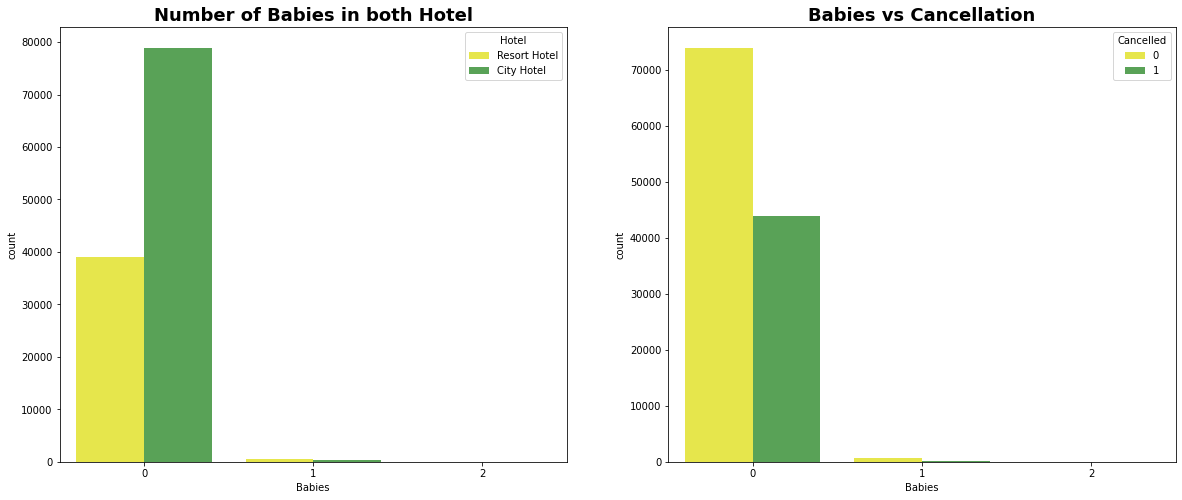

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Babies',hue='Hotel',data=hotel_data,palette='Set1_r')
plt.title('Number of Babies in both Hotel',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Babies',hue='Cancelled',palette='Set1_r')
plt.title('Babies vs Cancellation',fontweight='bold',size=18)
plt.show()

Visitors with 2 children preferred city hotel and most visitor in pair comes with no children 

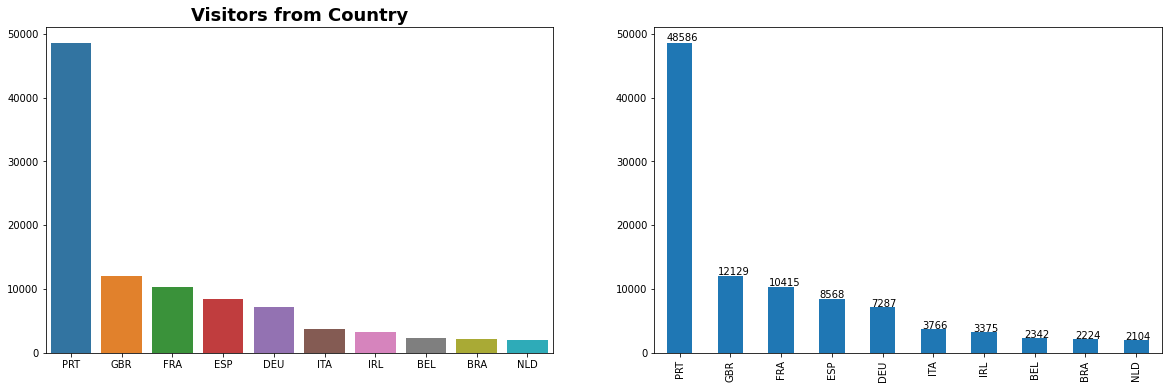

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Visitors from Country',fontweight='bold',size=18)
sns.barplot (y= list(hotel_data.Country.value_counts().head (10)), x= list(hotel_data.Country.value_counts().head(10).index))
plt.subplot(1,2,2)
ax=hotel_data.Country.value_counts().head(10).plot(kind='bar')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

plt.show()

Most visitors were from western europe and around 40% of all booking were booked from Portugal followed by Great Britain and France

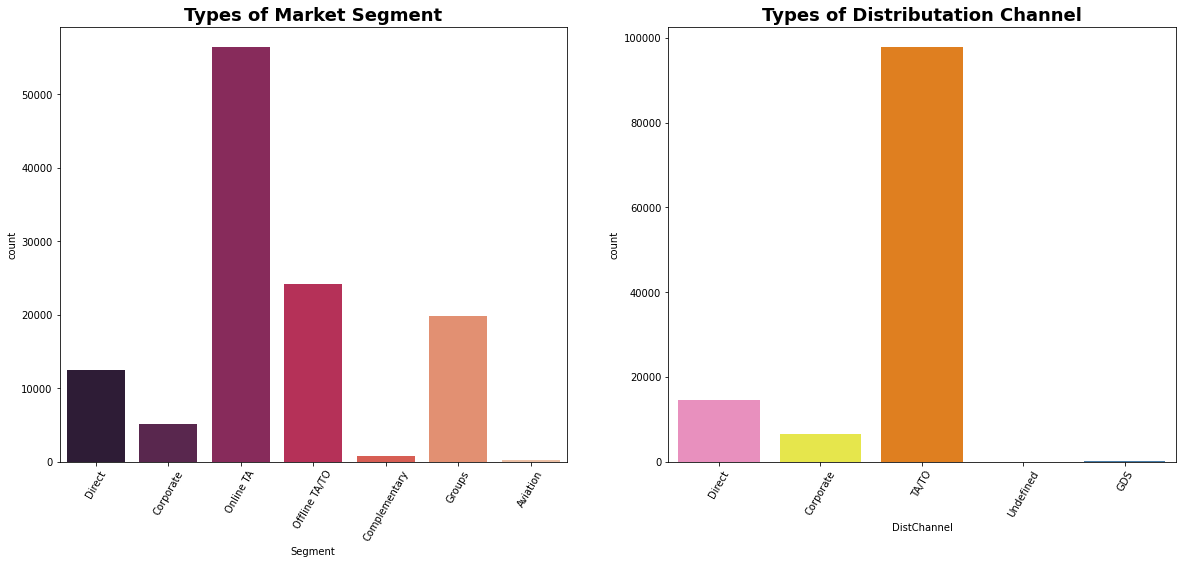

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Segment',data=hotel_data,palette='rocket')
plt.title('Types of Market Segment',fontweight='bold',size=18)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='DistChannel',palette='Set1_r')
plt.title('Types of Distributation Channel',fontweight='bold',size=18)
plt.xticks(rotation=60)
plt.show()

Majority of the distributation channels and market segment were Travel Agencies and Travel Operators with offline/online

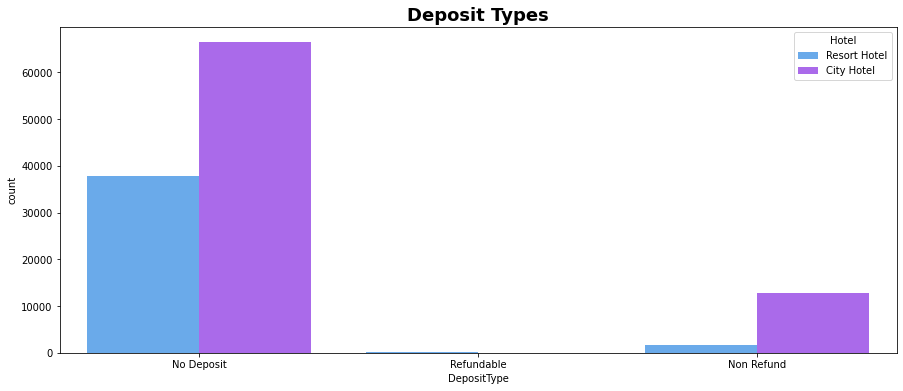

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_data,x='DepositType',hue='Hotel',palette='cool')
plt.title('Deposit Types',fontweight='bold',size=18)
plt.show()

No deposit for city hotels whereas Resort hotels had some deposit.
No deposit may lead to cancel the bookings.

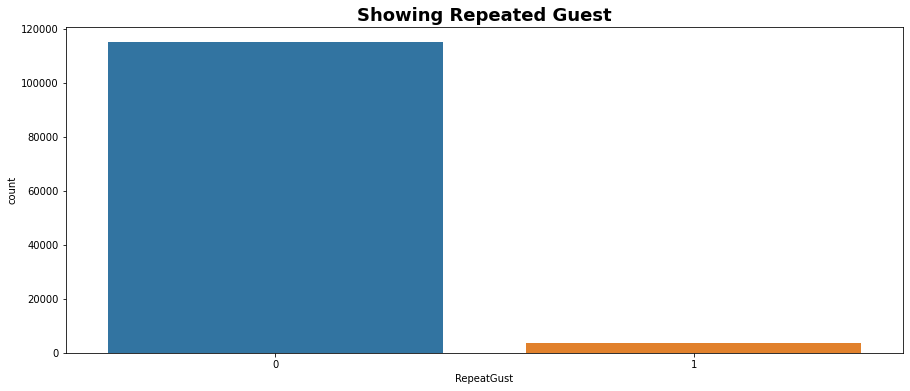

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_data,x='RepeatGust').set_title('Showing Repeated Guest',fontweight='bold',size=18)
plt.show()

Less number of repeated guest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


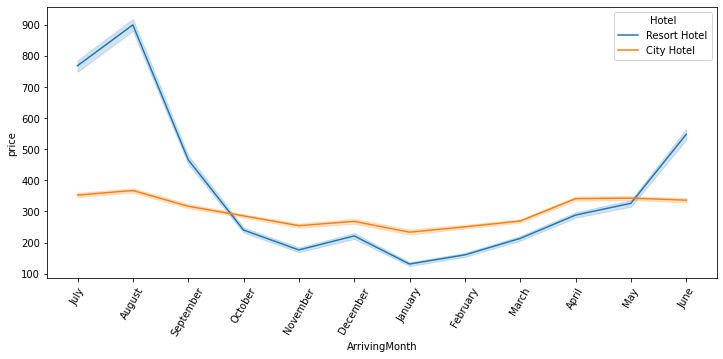

In [ ]:
plt.figure(figsize=(12,5))
hotel_data['adr_pp']=hotel_data['ADR']/(hotel_data['Adult']+hotel_data['Children'])
actual_guest=hotel_data.loc[hotel_data['Cancelled']=='0']
actual_guest['price']=actual_guest['ADR']*(actual_guest['WeekendStay']+actual_guest['WeekStay'])
sns.lineplot(data=actual_guest,x='ArrivingMonth',y='price',hue='Hotel')
plt.xticks(rotation=60)
plt.show()

Price of resort hotel are much higher and price of city hotel do not fluctuate that much.

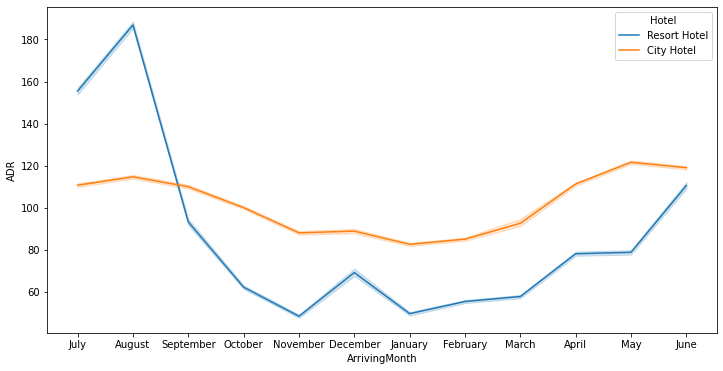

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR',hue='Hotel',data=hotel_data)
plt.show()

For Resort hotel, ADR is more expensive during July,August and september and for City Hotel, ADR is slightly more during May, June and July.

<B>What is the relationship between lead time and cancellation.</B>

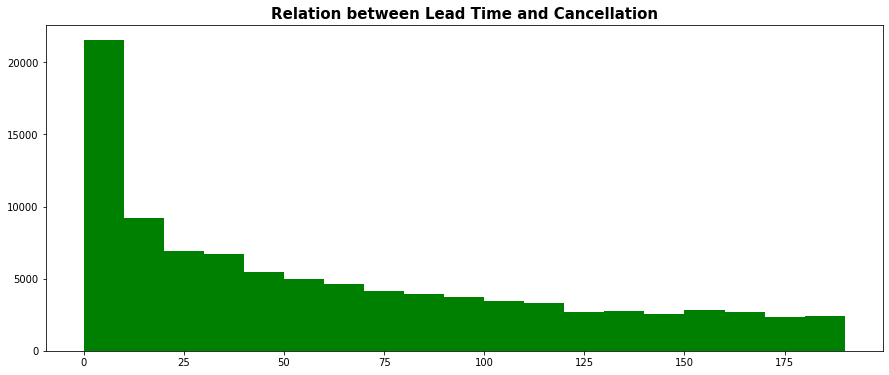

In [ ]:
plt.figure(figsize=(15,6))
plt.hist(hotel_data.LeadTime,bins=np.arange(0,200,10),color='green')
plt.title('Relation between Lead Time and Cancellation', fontweight='bold',size=15)
plt.show()

Lead time has a positive corelation with cancellation

<B>Relationship between deposit type and cancellation</B>

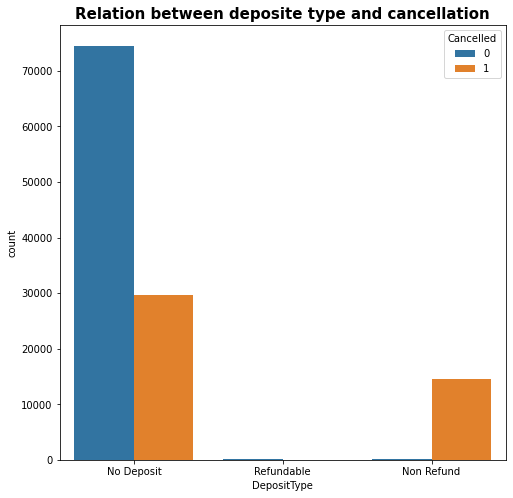

In [ ]:
plt.title('Relation between deposite type and cancellation',fontweight='bold', size=15)
sns.countplot(data=hotel_data,x='DepositType',hue='Cancelled')
plt.show()

Around 25% of booking were cancelled by guest with no deposit. These number are huge if the hotels were not able to replace the cancelled boking in time. so, its obvious that guests who do not pay any deposit while booking are likely to cancel more reservation. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposites. Logically one would have asumed that refundable deposits have more cancellation as hotel rates are usually higher for refunable deposit type rooms and customer pay more in anticipation of cancellation.



In [ ]:
hotel_data['adr_pp']=hotel_data.ADR/hotel_data.total_members
monthlyadr=hotel_data.groupby(['Hotel','ArrivingMonth'])['adr_pp'].mean()
monthlyadr=monthlyadr.dropna(axis=0)
monthlyadr=pd.DataFrame({'Hotel':(map(lambda x:x[0],monthlyadr.index)),'Month':list(map(lambda x:x[1],monthlyadr.index)),'Mean':monthlyadr.values})
monthlyadr

,Hotel,Month,Mean
0,City Hotel,October,59.309746
1,Resort Hotel,April,42.752176
2,Resort Hotel,August,84.773888
3,Resort Hotel,February,30.343367
4,Resort Hotel,January,30.896964
5,Resort Hotel,July,71.589481
6,Resort Hotel,June,55.393648
7,Resort Hotel,March,33.541821
8,Resort Hotel,May,41.958140
9,Resort Hotel,November,29.482306


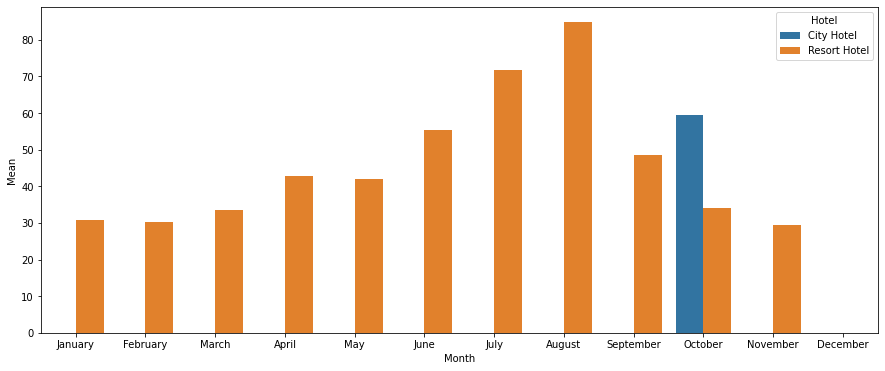

In [ ]:
plt.figure(figsize=(15,6))
sorted_month=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot(y='Mean',x='Month',data=monthlyadr,hue='Hotel',order=sorted_month)
plt.show()

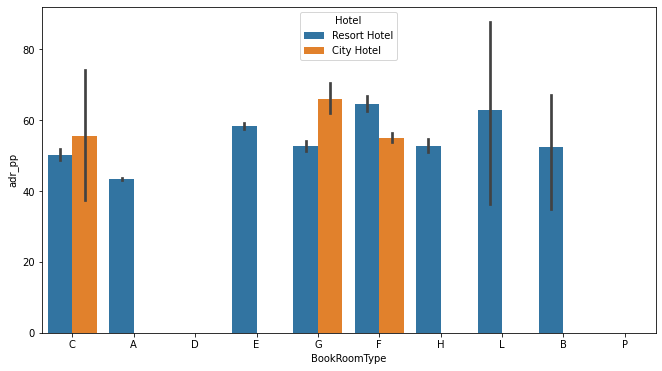

In [ ]:
plt.figure(figsize=(11,6))
sns.barplot(data=hotel_data,x='BookRoomType',y='adr_pp',hue='Hotel')
plt.show()


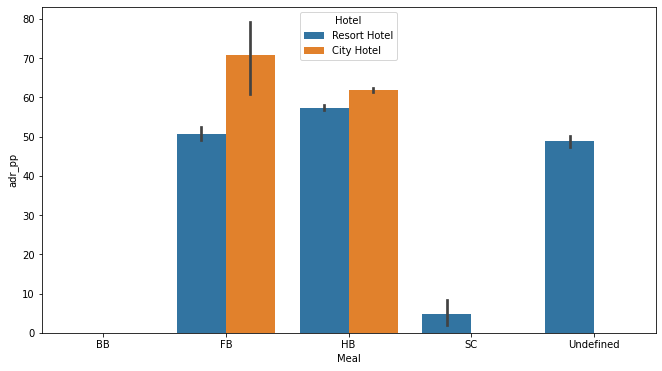

In [ ]:
plt.figure(figsize=(11,6))
sns.barplot(data=hotel_data,x='Meal',y='adr_pp',hue='Hotel')
plt.show()

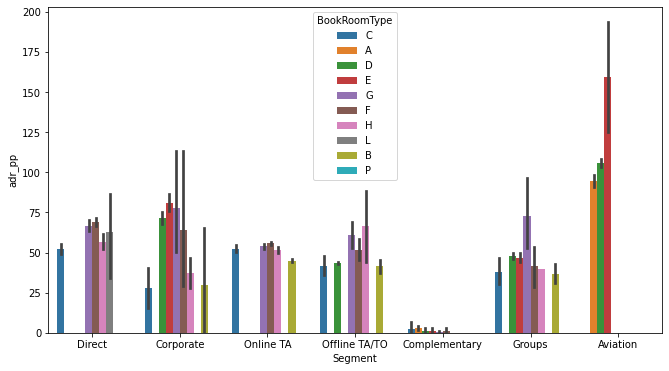

In [ ]:
plt.figure(figsize=(11,6))
sns.barplot(data=hotel_data,x='Segment',y='adr_pp',hue='BookRoomType')
plt.show()

This plot shows that prices in the Resort Hotels are much higher during the summer and prices of City Hotel varies less and is most expensive during spring and autum and these vary with room type and meal type.

<U><B>Conclusion</B></u>
*   Higher lead time has higher chance of cancellation. also previous cancellation increases chance of a cacellation.
*   The city hotel has more guest during spring and autumn, when the price are also highest, in july and August there are less visitors, although prices are lower. Thus, customer can get good deal on booking in July and August in city hotels.
*   Guest numbers for the Resort hotel go down slightly from june to september, which is also when the prices are highest. Thus, these months should be avoided for booking.
*   April to August is the peak time of booking both in hotel have the fewest guest during the winter.
*   No deposit cancellation are high compared to other categories but these should not be discouraged as booking in this category are also very high compared to non refundable type bookings.
*   Cancellation are high when done through agents compared to direct booking. Hotels need to do marketing and give special incentives for direct booking as these may establish personal one to one relationship promoting customer loyality.
*   The majority of guests come from western europe contries.
*   The majority of reservations are for city hotels.
*   The number of repeated guest is too low.
*   The majority of reservations converts in to successful transations.











<U><B>Strategies to Counter High Cancellation at the Hotel</B></u>

1)Set Non-refundable Rates, Collect deposits and implement more rigid cancellation policies.

2)Encourage Direct booking by offering special discounts.

3)Monitor where the cancellations are coming from such as market segment, distributation channels, etc.